# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

(array([ 2278.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   157.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

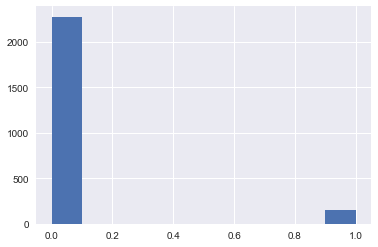

In [4]:
data_b = data[data.race=='b']
data_w = data[data.race=='w']
plt.hist(data_b.call)

## 1. What test is appropriate for this problem? Does CLT apply?

We are trying to perform a statistical analysis on whether race has a significant impact on the rate of callbacks for resumes.
So the variable callbacks will be studied. This variable 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not. This characterize a discrete variable.
As we have two categorical variables from a single population we can choose the chi square test.
To check if CLT applies we should see if the criteria meet: 
**min(np, n(1-p)) >= 5**

In [5]:
n = len(data_b)
p = sum(data_b.call)/len(data_b)
np.min((n*p, n*(1-p))) >= 5

True

## 2. What are the null and alternate hypotheses?

The null hypothesis represents the "no change" or "no difference" situation. In our case the race has no impact on the callbacks, so the probability of black-sounding names being called is equal to the probability of white-sounding names. We represent as

**H0: p_b = p_w**

The alternate hypothesis is the opposite

**Ha: p_b <> p_w**

Now, we should **Set up decision rule**:  
The decision rule for the χ2 test depends on the level of significance and the degrees of freedom, defined as degrees of freedom (df) = k-1 (where k is the number of response categories). If the null hypothesis is true, the observed and expected frequencies will be close in value and the χ2 statistic will be close to zero. If the null hypothesis is false, then the χ2 statistic will be large. Critical values can be found in a table of probabilities for the χ2 distribution. Here we have df=k-1=2-1=1 and a 5% level of significance. The appropriate critical value is 3.84, and the decision rule is as follows: 
**Reject H0 if χ2 > 3.84**

In [6]:
# Computing chi square
# chi square = sum((O-E)**2/E)
# O: Observed frequencies
# E: Expected frequencies
O = sum(data_b.call)
E = sum(data_w.call)
chi_sqr = (O-E)**2/E
chi_sqr

25.889361702127658

In [7]:
chi_sqr == 3.84

False

**The null hypothesis is rejected**
This means that probability of black-sounding names being called is not equal to the probability of white-sounding names, making the alternate hypothesis true.

In [8]:
#Another way to do is by using the scipy stats chi square 
stats.chisquare(sum(data_b.call),f_exp=sum(data_w.call))

Power_divergenceResult(statistic=25.889361702127658, pvalue=nan)

## 3. Compute margin of error, confidence interval, and p-value.

In [9]:
#The comparison of two proportions p1 and p2 involves analyzing the difference between the two sample proportions sp1 and sp2
#To find a confidence interval for the difference of proportions p1-p2, estimate the standard deviation sD from the data by 
#replacing the unknown values p1 and p2 with the sample proportions 1 and  2 taken from samples of size n1 and n2

#sample proportion for blacks
sp_b = sum(data_b.call)/len(data_b.call)
#sample proportion for whites
sp_w = sum(data_w.call)/len(data_w.call)
#the difference between sample proportions
diff_prop = sp_w-sp_b
diff_prop

0.032032854209445585

In [10]:
#A 95% confidence interval for the difference between the two proportions is sp_b - sp_w + 1.96*sD
#where

sD = np.sqrt((sp_b*(1-sp_b))/len(data_b.call) + (sp_w*(1-sp_w))/len(data_w.call)) 
sD


0.0077833705866767544

In [11]:
#Because you want a 95% confidence interval, your z*-value is 1.96
#this is the margin of error
m_o_er = 1.96*sD
m_o_er

0.015255406349886438

**this is the margin of error 1.5%**

In [12]:
#The confidence interval is the difference between proportions 
#plus and minus the margin of error
conf_int = ((diff_prop-m_o_er),(diff_prop+m_o_er))
conf_int

(0.016777447859559147, 0.047288260559332024)

When using chi square test in order to find the p-value we should look in the chi square distribuition table.
Having 1 degree of freedom, as calculated above, we should look for the closest number to the chi_sqr = 25.9 calculated.
The highest chi sqr value in the table was chi_sqr = 10.8 and the p-value is 0.001, this means that the p-value for this test is < 0.001.

## 4. Write a story describing the statistical significance in the context or the original problem.

As our p value is lower than our significance value, we've shown that our experimental results would be highly unlikely to occur if there was no real connection between the variables manipulated and the effect you observed. 
With 95% confidence that a higher percentage of white-sounding names than black sounding names have received callbacks, and the difference in these percentages is somewhere between 1.6% and 4.7%, based on this sample.

In [13]:
0.0167*100

1.67

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No, because we've looked only one variable to try to explain the callbacks, which was race. I would probably run statistical models like regression for example to look for significant variables in the data provided.